In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets as dt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import make_blobs
import time
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.colors as mcolors
from sklearn.preprocessing import MinMaxScaler

In [6]:
# In R, I exported the dataset to a csv file. It is part of the base R distribution.
df = pd.read_csv('C:\\Users\\apoghosyan\\Dropbox\\YSU_ML\\ISLR_Data\\USArrests.csv', usecols = [1,2,3,4])
df.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [10]:
X = pd.DataFrame(scale(df), index = df.index, columns = df.columns)
X.head(5)

C:\Users\apoghosyan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [15]:
# The loading vectors
mod_pca = PCA()
print(mod_pca)
mod_pca_fit = mod_pca.fit(X)
mod_pca_fit.components_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [16]:
pca_loadings = pd.DataFrame(mod_pca_fit.components_.T, index = df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [18]:
df_plot = pd.DataFrame(mod_pca_fit.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head(5)

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


In [19]:
# Standard deviation of the four principal components
np.sqrt(mod_pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [21]:
np.cumsum(mod_pca.explained_variance_ratio_)

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

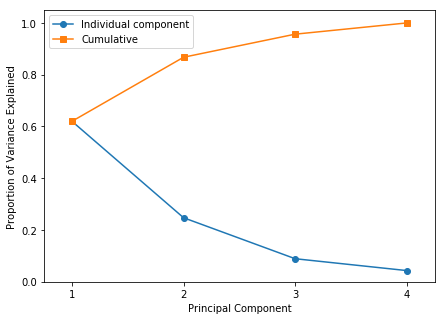

In [23]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], mod_pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(mod_pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

In [1]:
from sklearn.decomposition import PCA

Time Before PCA ->  2.1862337589263916
Time With PCA ->  0.7680859565734863


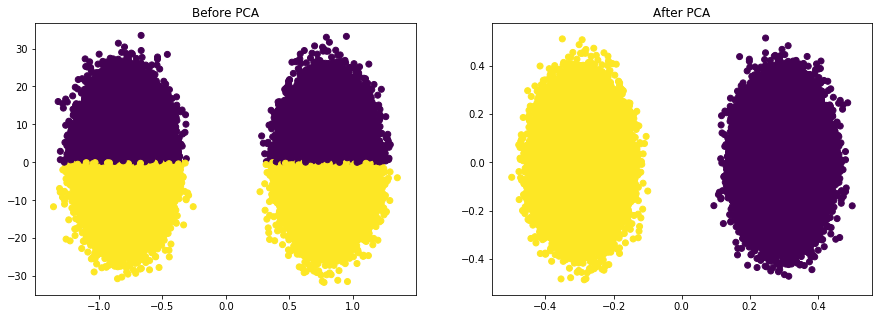

In [14]:
X, y = make_blobs(n_samples = 500000, random_state = 1, 
                  centers = [[-8,0],[8,0]],
                  cluster_std = [1.2,1.2])

X[:,1] = 6*X[:,1]
X[:,0] = 0.1* X[:,0]

start = time.time()
mod_X = KMeans(n_clusters = n)
y_pred_X = mod_X.fit(X).labels_
end = time.time()
print("Time Before PCA -> ", end-start)

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c = y_pred_X)
plt.title("Before PCA")



start = time.time()
ss = MinMaxScaler()
mod_PCA = PCA()
X_PCA = mod_PCA.fit_transform(ss.fit_transform(X))
mod_X_PCA = KMeans(n_clusters = n)
y_pred_X_PCA = mod_X_PCA.fit(X_PCA).labels_
end = time.time()
print("Time With PCA -> ", end - start)

plt.subplot(122)
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c = y_pred_X_PCA)
plt.title("After PCA")
plt.show()